In [1]:
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# DATA IMPORT

In [2]:
scaler = joblib.load("scaler.pkl")
encoder = tf.keras.models.load_model("ae_encoder.keras")
xgb_model = xgb.XGBClassifier()
xgb_model.load_model("xgb_model.json")

In [3]:
test_df = pd.read_csv("test_data_for_simulation.csv")

In [4]:
test_df["Label"].unique()

array(['Heartbleed', 'Web Attack - XSS', 'Web Attack - SQL Injection',
       'BENIGN'], dtype=object)

In [5]:
X_test = test_df.drop(columns=["Label"])
y_test_raw = test_df["Label"]
y_test = y_test_raw.apply(lambda x: 0 if x == "BENIGN" else 1)

In [6]:
X_test_scaled = scaler.transform(X_test)
z_test = encoder.predict(X_test_scaled)

5151/5151 [==============================] - 4s 810us/step


# EVALUATION

In [7]:
y_pred = xgb_model.predict(z_test)

\n=== Classification Report ===\n
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    159454
           1       1.00      0.99      0.99      5373

    accuracy                           1.00    164827
   macro avg       1.00      0.99      1.00    164827
weighted avg       1.00      1.00      1.00    164827



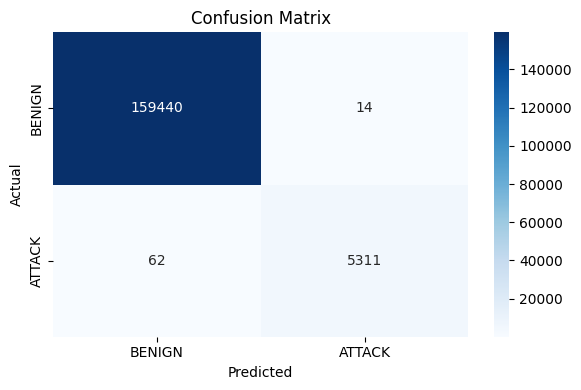

In [8]:
print("\\n=== Classification Report ===\\n")
print(classification_report(y_test, y_pred))

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['BENIGN', 'ATTACK'], yticklabels=['BENIGN', 'ATTACK'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()